In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Classification_train.csv")

In [3]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      8       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      7       0       0       0       0       0       0       0       0   
4      7       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
X_train=np.array(df.loc[0:24999,"pixel0":])
y_train=np.array(df.loc[0:24999,"label"])

In [5]:
print(X_train.shape)
print(y_train.shape)

(25000, 784)
(25000,)


In [6]:
X_cv=np.array(df.loc[25000:,"pixel0":])
y_cv=np.array(df.loc[25000:,"label"])

In [7]:
print(X_cv.shape)
print(y_cv.shape)

(5000, 784)
(5000,)


In [8]:
X_train_n=X_train/255
X_cv_n=X_cv/255

In [9]:
def euclidean_dist(X1,X2):
    distance= np.sqrt(np.sum((X1-X2)**2,axis=1))
    return distance

In [16]:
def train_predict(X_train,y_train,k,X_test,distances):
    y_pred=[]
    for i in range (X_test.shape[0]):
        labels=y_train[np.argsort(distances[i,:])[:k]]
        unique_labels, counts = np.unique(labels, return_counts=True)
        pred=unique_labels[np.argmax(counts)]
        y_pred.append(pred)
    return y_pred

In [20]:
distances=np.zeros((X_cv_n.shape[0],X_train.shape[0]))
c=[]
for i in range(X_cv_n.shape[0]):
    distances[i,:]=euclidean_dist(X_train_n,X_cv_n[i,:])
for i in range(1,10):
    y_pred=train_predict(X_train_n,y_train,i,X_cv_n,distances)
    t=np.sum((y_pred==y_cv)*1)/5000*100
    print(t)
    c.append(t)

98.38
97.84
98.08
97.78
97.88
97.72
97.74000000000001
97.54
97.58


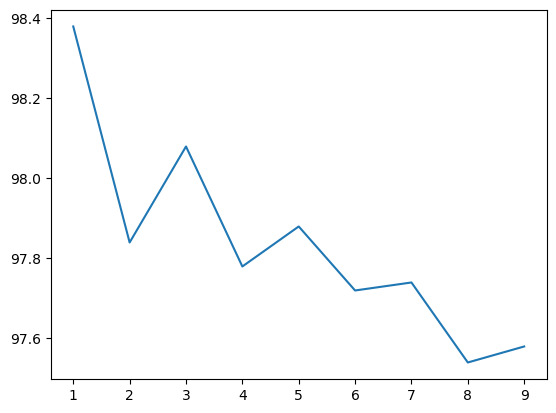

In [23]:
plt.plot(range(1,10),c)
plt.show()

In [24]:
df2=pd.read_csv('Classification_test.csv')

In [25]:
df2.head()

ID  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0  15795       0       0       0       0       0       0       0       0   
1    860       0       0       0       0       0       0       0       0   
2   5390       0       0       0       0       0       0       0       0   
3  11964       0       0       0       0       0       0       0       0   
4  11284       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [27]:
X_test=np.array(df2.loc[:,'pixel0':])/255

In [30]:
distances=np.zeros((X_test.shape[0],X_train.shape[0]))
for i in range(X_test.shape[0]):
    distances[i,:]=euclidean_dist(X_train_n,X_test[i,:])

In [33]:
y_pred_test=np.array(train_predict(X_train_n,y_train,3,X_cv_n,distances))

In [34]:
print(y_pred_test.shape)

(5000,)


In [35]:
print(y_pred_test)

[0 4 5 ... 1 1 2]
